In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lm

In [2]:
df = pd.read_csv('data/salary_data.csv')

In [3]:
df.head()

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [5]:
X = std_scaler.fit_transform(df['experience'].values.reshape(-1, 1))
y = mm_scaler.fit_transform(df['salary'].values.reshape(-1, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

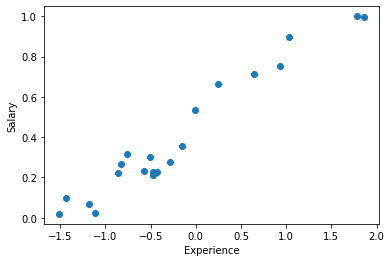

In [7]:
plt.scatter(X_train, y_train)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
class LinearRegression:
    def __init__(self):
        # attributes
        self.weights = None
        self.bias = None

        self.losses = []

    def __slope(self, x, w, b):
        '''
		performs slope calculation y = m * x + b
		x = Input Features
		w = Weights
		b = Bias
		'''
        return np.matmul(x, w) + b

    def __loss(self, x, y, w, b):
        '''
		computes Mean Sqared Error for given X & y per iteration
		'''
        loss = 0
        samples = len(x)

        for i in range(0, samples):
            pred = self.__slope(x[i], w, b)[0]
            loss += (y[i] - pred) ** 2

        return loss/float(samples)    

    def __optimizer(self, x, y, w, b, learning_rate):
        '''
		performs Gradient Descent to optimize Weights & Bias paramters per iteration
		'''
        dw, db = 0, 0
        samples = len(x)

        #  (y - (w * x + b))**2/num_samples
        #  2 * (y - (w * x + b)) / num_samples

        for i in range(0, samples):
            dw +=  - (2 * (y[i] - self.__slope(x[i], w, b)[0]) * x[i]) / samples
            db += - (2 * (y[i] - self.__slope(x[i], w, b)[0])) / samples

        # m*n n*k = m*k
        w -= learning_rate * dw.reshape(x.shape[1], 1)
        b -= learning_rate * db

        return w, b    

    def fit(self, X, y, epochs=30, learning_rate=0.1, batch_size=8, interval=1):
        '''
		Training function
		'''
		# Initialize/Sample weights and biases from a random normal distribution
		# Xavier Initialization
		# Square Root(6 / (1.0 + input features + output features))
        lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

        w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
        b = np.random.uniform(low = -lim, high = lim, size=1)[0]

        num_samples = len(X)
        
        # Train the model for given epochs in batches
        for i in range(epochs):
            # create batches
            # [1, 2, 3, 4, 5, 6]
            # [1, 2] [3, 4] [5, 6]
            for offset in range(0, num_samples, batch_size):
                # create batches 
                end = offset + batch_size
                batch_x, batch_y = X[offset:end], y[offset:end]

                # calculate loss
                loss = self.__loss(batch_x, batch_y, w, b)

                # perform Gradient Descent to optimize Weights & Biases	
                w, b = self.__optimizer(batch_x, batch_y, w, b, learning_rate)
            
            # store losses as an array
            self.losses.append(loss)

            # Display training loss based on interval value
            if((i==0) or (i==(epochs-1) or (i % interval) == 0)):
                print(f"Epoch {i+1}, Loss: {loss[0]:.4f}")

        self.weights = w
        self.bias = b        

    def predict(self, x):
        '''
		returns predicted values when input with new data points
		'''
        if self.weights is not None:
            return np.matmul(x, self.weights) + self.bias

        else:
            lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

            w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
            b = np.random.uniform(low = -lim, high = lim, size=1)[0]

            return np.matmul(x, w) + b

In [9]:
model = LinearRegression()

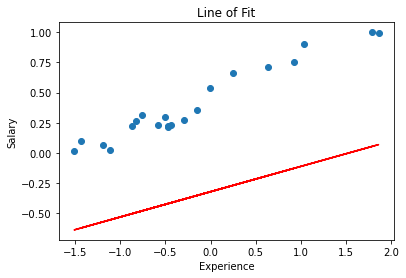

In [10]:
line = model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [11]:
model.fit(X_train, y_train, epochs=100, learning_rate=0.1, interval=10)

Epoch 1, Loss: 0.3281
Epoch 11, Loss: 0.0071
Epoch 21, Loss: 0.0070
Epoch 31, Loss: 0.0070
Epoch 41, Loss: 0.0070
Epoch 51, Loss: 0.0070
Epoch 61, Loss: 0.0070
Epoch 71, Loss: 0.0070
Epoch 81, Loss: 0.0070
Epoch 91, Loss: 0.0070
Epoch 100, Loss: 0.0070


In [12]:
line = model.predict(X_train)

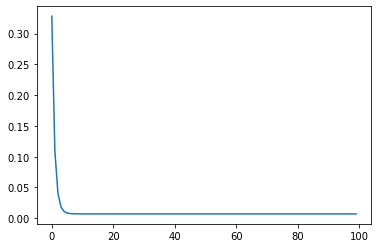

In [13]:
plt.plot(model.losses)
plt.show()

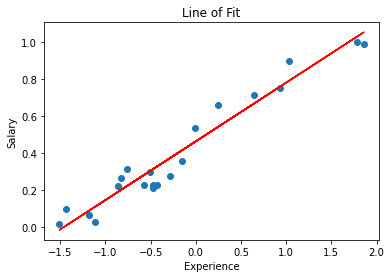

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [15]:
sk_model = lm()

In [16]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
sk_line = sk_model.predict(X_train)

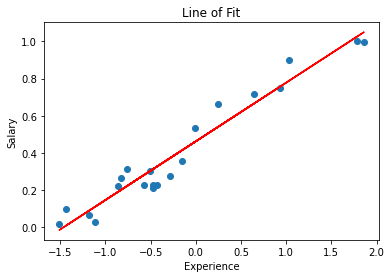

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, sk_line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [19]:
t_pred = model.predict(X_test)

In [20]:
print(f"My loss: {mse(t_pred, y_test):.4f}")

My loss: 0.0028


In [21]:
sk_pred = sk_model.predict(X_test)

In [22]:
print(f"SK loss: {mse(sk_pred, y_test):.4f}")

SK loss: 0.0025


In [23]:
new_df = pd.read_csv('data/Ecommerce Customers')

In [24]:
new_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
X = std_scaler.fit_transform(new_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values)
y = mm_scaler.fit_transform(new_df['Yearly Amount Spent'].values.reshape(-1, 1))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
m_model = LinearRegression()

In [28]:
m_model.fit(X_train, y_train, epochs=50, batch_size=8, learning_rate=0.1, interval=10)

Epoch 1, Loss: 0.0001
Epoch 11, Loss: 0.0001
Epoch 21, Loss: 0.0001
Epoch 31, Loss: 0.0001
Epoch 41, Loss: 0.0001
Epoch 50, Loss: 0.0001


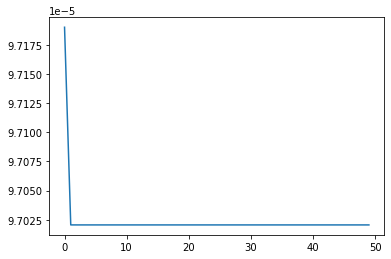

In [29]:
plt.plot(m_model.losses)
plt.show()

In [30]:
t_pred = m_model.predict(X_test)
print(f"My loss: {mse(t_pred, y_test):.4f}")

My loss: 0.0004


In [31]:
sk_model = lm()

In [32]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
sk_pred = sk_model.predict(X_test)
print(f"Sk loss: {mse(sk_pred, y_test):.4f}")

Sk loss: 0.0004
